## Q-1-1-1 

Implement a KNN classifier for each of the datasets. Report precision, recall, f1 score and accuracy. Compare your result with in-built(scikit-learn) KNN function to check correctness of your algorithm.

In [8]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import operator
import sys

loading dataset according to filenames.

In [9]:
FLAG = sys.argv[1]
filename = sys.argv[2]
FLAG = "iris"
def loadfile(FLAG):
    if FLAG=="iris":
        filename = '../input_data/Iris/Iris.csv'
        df = pd.read_csv(filename, names = ["a", "b", "c", "d", "Y"])
    elif FLAG=="robot1":
        filename = '../input_data/RobotDataset/Robot1'
        df = pd.read_csv(filename, delim_whitespace=True, names = ["Y", "a", "b", "c", "d", "e", "f", "g"])
        df = df.drop(['g'],axis=1)
    else:
        filename = '../input_data/RobotDataset/Robot2'
        df = pd.read_csv(filename, delim_whitespace=True, names = ["Y", "a", "b", "c", "d", "e", "f", "g"])
        df = df.drop(['g'],axis=1)
    return df

df = loadfile(FLAG)

making dataframe and splitting data in train-test

In [10]:
Y = df.Y
X = df.drop(['Y'],axis='columns')

if FLAG != "iris":
    X = pd.DataFrame( preprocessing.normalize(X), columns = [ "a", "b", "c", "d", "e", "f" ]  )

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)
labels = Y.unique()
df1 = pd.concat([X_train, Y_train],axis='columns').reset_index(drop=True)

inbuilt scikit-learn KNN classifier

In [11]:
knn_sys = KNeighborsClassifier(n_neighbors=5)
knn_sys.fit(X_train, Y_train)
Y_predict = knn_sys.predict(X_test)
print confusion_matrix(Y_test,Y_predict)
print classification_report(Y_test,Y_predict)
print accuracy_score(Y_test, Y_predict)

[[9 0 0]
 [0 6 3]
 [0 0 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.75      1.00      0.86         9

      micro avg       0.89      0.89      0.89        27
      macro avg       0.92      0.89      0.89        27
   weighted avg       0.92      0.89      0.89        27

0.8888888888888888


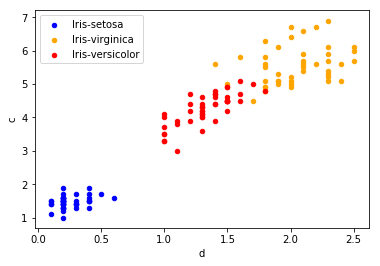

In [12]:
%matplotlib inline

ax = df[df['Y'] == "Iris-setosa" ].plot.scatter(x = 'd', y='c', c='blue', label='Iris-setosa')
ax = df[df['Y'] == "Iris-virginica"].plot.scatter(x = 'd', y='c', c='orange', label='Iris-virginica', ax=ax)
ax = df[df['Y'] == "Iris-versicolor"].plot.scatter(x = 'd', y='c', c='red', label='Iris-versicolor', ax=ax)
ax

Function which calculate Euclidean Distance

In [13]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

actual KNN algorithm which predict class label from training data and K neighbours

In [14]:
def predict( df, k=5 ):
    Y_predict = []
    for index, row in X_test.iterrows():
        distance = {}
        labeldict = {i:0 for i in labels}
        for index1, row1 in df1.iterrows():
            distance[index1] = euclidean_distance(row,row1)
        
        ordered_dict = sorted(distance.items(), key=operator.itemgetter(1))
        
        count = k
        for index,_ in ordered_dict:
            count-=1
            labeldict[df1.iloc[index].Y]+=1
            if count==0:
                break
                
        ans_label=0
        ans_count=-1
        
        for label,cnt in labeldict.iteritems():
            if cnt>=ans_count:
                ans_label=label
                ans_count=cnt
        Y_predict.append(ans_label)
    return Y_predict

p = predict(X_test,5)
# print p
print confusion_matrix(Y_test,p)
print classification_report(Y_test,p)
print accuracy_score(Y_test,p)

[[9 0 0]
 [0 6 3]
 [0 0 9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.67      0.80         9
 Iris-virginica       0.75      1.00      0.86         9

      micro avg       0.89      0.89      0.89        27
      macro avg       0.92      0.89      0.89        27
   weighted avg       0.92      0.89      0.89        27

0.8888888888888888
